In [1]:
# Import from libraries.
from numpy import empty, zeros, max, linspace, meshgrid # Import any other math functions you need here.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# Current density function.
def J(x,y):
    J = zeros(2,float)
    # Current density for a wire with current flowing up 
    # the y-axis in the center of the square.
    a = 0.5 # Radius of the wire.
    if (abs(x)<a):
        J[0] = 0 # Function for J_x
        J[1] = 1 # Function for J_y
    else:
        J[0] = 0 # Function for J_x
        J[1] = 0 # Function for J_y
    return J


In [2]:
# Set constants.
M = 100 # Number of grid squares on a side.
Atop = ([0.0,1e-5]) # Magnetic potential at top boundary.
Abottom = ([0,1e-5]) # Magnetic potential at bottom boundary.
Aleft = ([0.0,1e-5]) # Magnetic potential at left boundary.
Aright = ([0.0,1e-5]) # Magnetic potential at right boundary.

xmin = -5 # Starting value of x & y.
xmax = 5 # Ending value of x & y.
dx = (xmax-xmin)/M # Step size. Don't need to change.

# Create arrays to hold potential values and points.
# A has two lists: The x-components of the magnetic potential,
# and the y-components of the magnetic potential. 
# It stores this information like so:
# A[k][i][j] is the kth-component (k = 0 means x, k = 1 means y)
# of A at the point(xlist[i],ylist[j])
A = zeros([2,M+1,M+1],float) # Current guess for potential.
Aprime = empty([2,M+1,M+1],float) # Next guess for potential.
xlist = linspace(xmin,xmax,M+1) # List of x-coordinates.
ylist = linspace(xmin,xmax,M+1) # List of y-coordinates.

# Set constant boundary conditions.
# Left edge, where i = 0 is fixed.
A[0,0,:] = Aleft[0]
A[1,0,:] = Aleft[1]
# Right edge, where i = M is fixed.
A[0,M,:] = Aright[0]
A[1,M,:] = Aright[1]
# Bottom edge, where j = 0 is fixed.
A[0,:,0] = Abottom[0]
A[1,:,0] = Abottom[1]
# Top edge, where j = M is fixed.
A[0,:,M] = Atop[0]
A[1,:,M] = Atop[1]

# If you need to set up a funciton along one of the edges,
# follow this example. It sets up A(1,x,0) = xmax*x-x**2 along 
# the bottom edge. This is just a function picked for demonstration.
# Use A[k,i,0] for the bottom edge, A[k,i,M] for the top edge,
# A[k,0,j] for the left edge, and A[k,M,j] for the right edge.
# for i in range(0,M+1):
#     A[0,i,0] = 0.0
#     A[1,i,0] = (xmax*xlist[i]-xlist[i]**2)*4/xmax**2

target = 1e-3#*max(abs(A)) # Target accuracy, scaled by problem.

# Main loop
delta = 1.0 # Current error between A and Aprime.
while delta > target: # Repeat until error is lower than target accuracy.
    # Calculate new values of the potential.
    for k in range(0,2):
        for i in range(M+1):
            for j in range(M+1):
                if i==0 or i==M or j==0 or j==M: # Endpoitns stay fixed.
                    Aprime[k,i,j] = A[k,i,j]
                else:
                    # Calculate next guess based on difference equation.
                    Aprime[k,i,j] = (A[k,i+1,j]+A[k,i-1,j]+A[k,i,j+1]+A[k,i,j-1])/4 + dx**2/4*J(xlist[i],ylist[j])[k]
    # Calculate maximum difference from old values.
    delta = max(abs(A-Aprime))
    # Swap the two arrays.
    A,Aprime = Aprime,A

# Find the maximum magnetic potential component to scale arrows in the graph.
Amax = max(abs(A))
    
print("Finished. Execute the next cell to graph.")



Finished. Execute the next cell to graph.


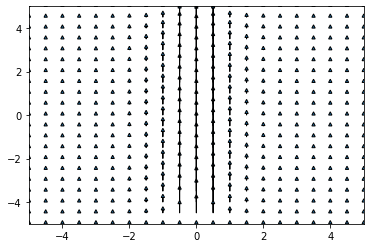

In [3]:
# Graph the magnetic vector potential.

# Set visual scale factors. Adjust as necessary to make magnetic vector potential visible.
arrow_length_scale_factor = 10 # Increase to make arrows longer.
arrow_head_scale_factor = 1 # Increase to make arrowheads larger.
arrow_skip = 5 # Increase to show fewer arrows.

Ascale = dx/Amax*arrow_length_scale_factor
A_fig = plt.figure()
A_ax = A_fig.add_subplot()
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)
for i in range(0,len(xlist),arrow_skip):
    for j in range(0,len(ylist),arrow_skip):
        plt.arrow(xlist[i],ylist[j],A[0][i][j]*Ascale,A[1][i][j]*Ascale,head_width=dx*arrow_head_scale_factor)

In [19]:
# Calculate the magnetic field B = curl(A).

# Initialize B array.
B = zeros([len(xlist),len(ylist)],float)

X, Y = meshgrid(xlist, ylist)

for i in range(1,len(xlist)-1):
    for j in range(1,len(ylist)-1):
        dAx = A[0][i][j+1]-A[0][i][j-1]
        dAy = A[1][i+1][j]-A[1][i-1][j]
        B[i][j] = (dAy-dAx)/(2*dx)

print("Finished. Execute the next cell to graph.")

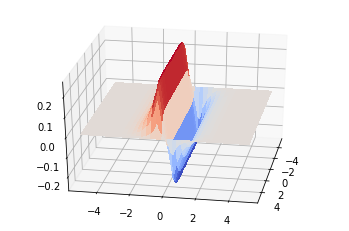

In [20]:
# Create new figure and plot B.
B_fig = plt.figure()
B_ax = B_fig.add_subplot(111, projection='3d')
B_surf = B_ax.plot_surface(X, Y, B, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
B_ax.view_init(30, 10)
plt.draw()
